In [1]:
import simulation_settings as ss
import ship as ship
import constants
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import glob
import driver
import time
import datetime
import statistics

In [3]:
gg = constants.gg
rho = constants.rho
beta = constants.beta
dt = constants.dt

0.0004026461228486261 0.35015563346172146
0.1149906168488484
0.0013591060371643923 0.3504332992356682
0.3878358706574818
0.004640381327598403 0.34920112383941293
1.3288563554945414
0.007731624187087055 0.3506952035226978
2.2046563823581486
0.003729010250241006 0.34899039974705903
1.0685137049453837
0.005769170390969063 0.35163483106017346
1.640670912370969
0.018227243514941815 0.3444342965044141
5.291936285069749
0.020026726702255818 0.34830024189821507
5.749845763273485
0.00928873139375686 0.35337150148871227
2.6286022937969067


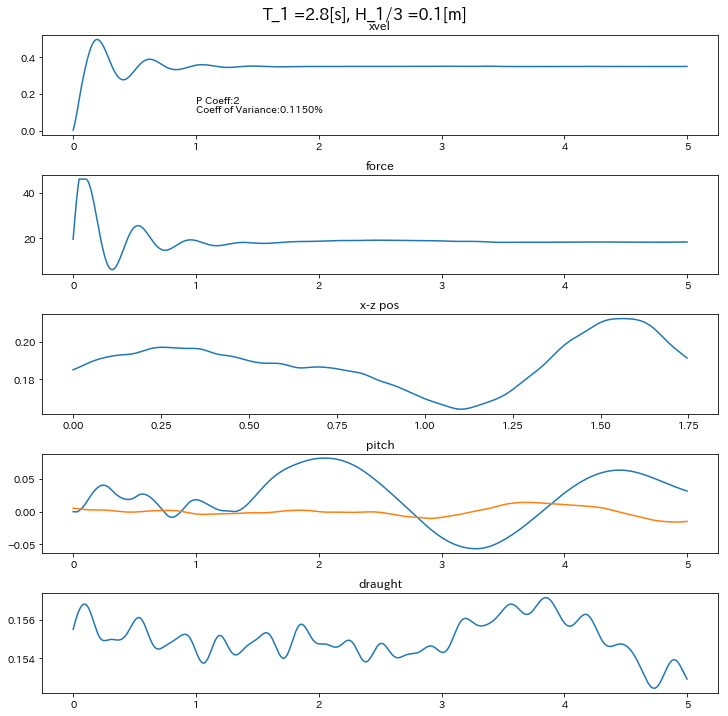

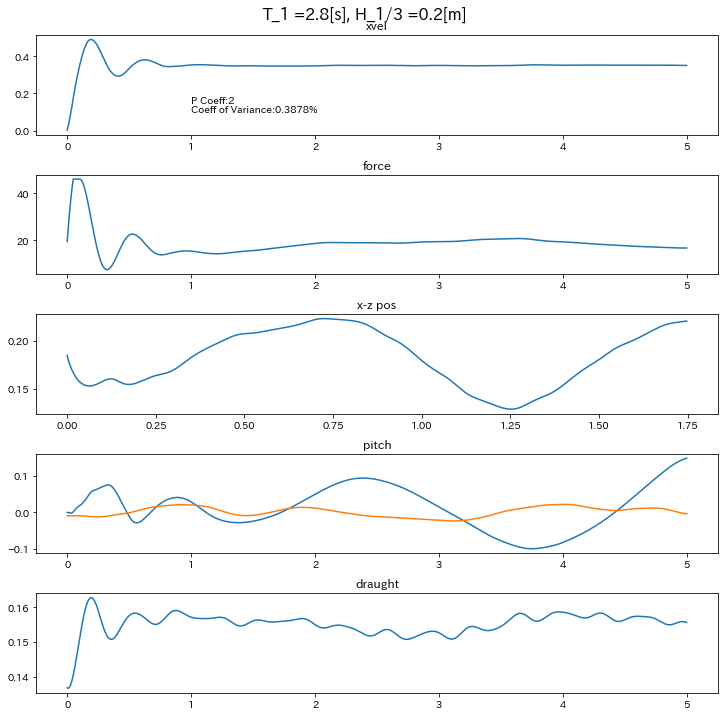

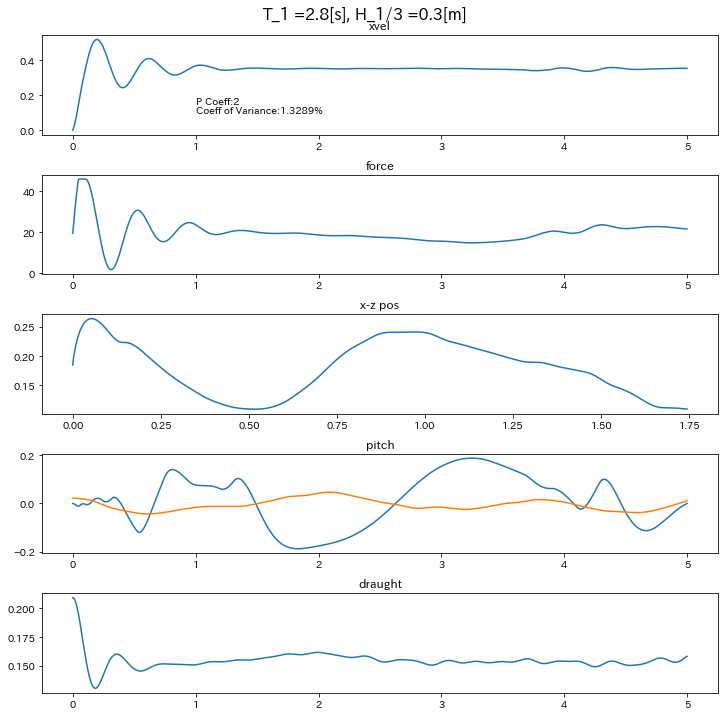

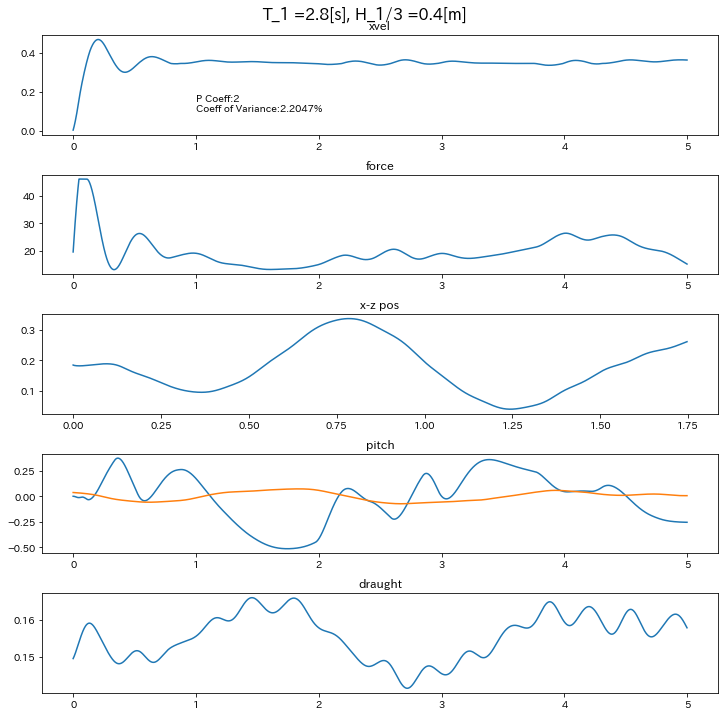

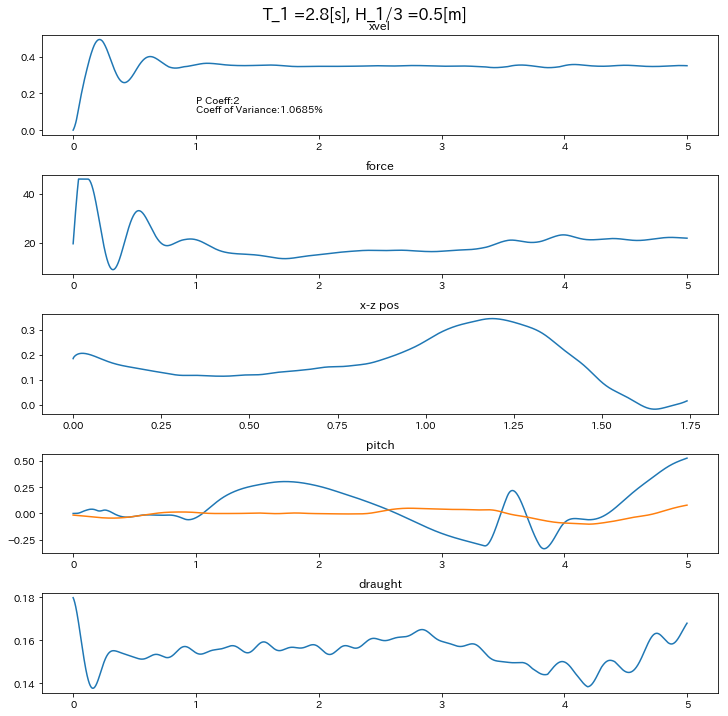

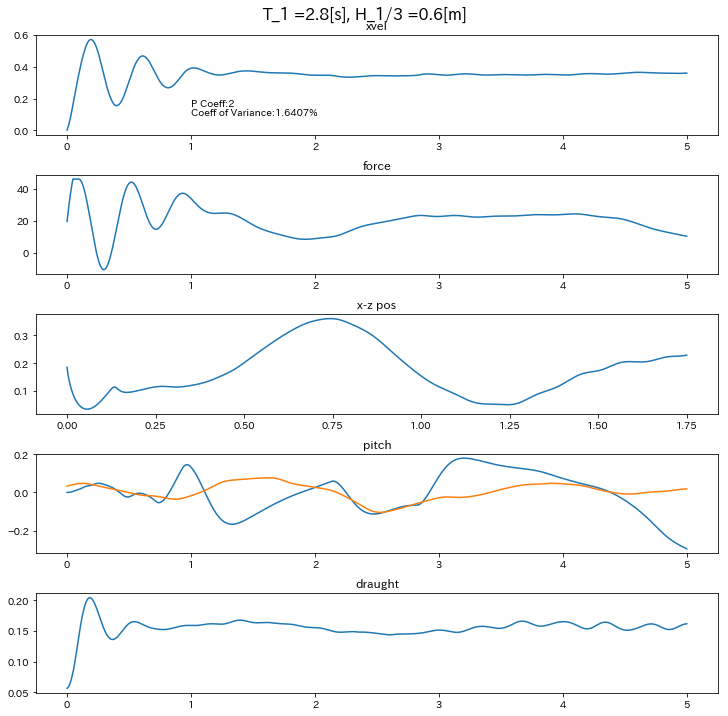

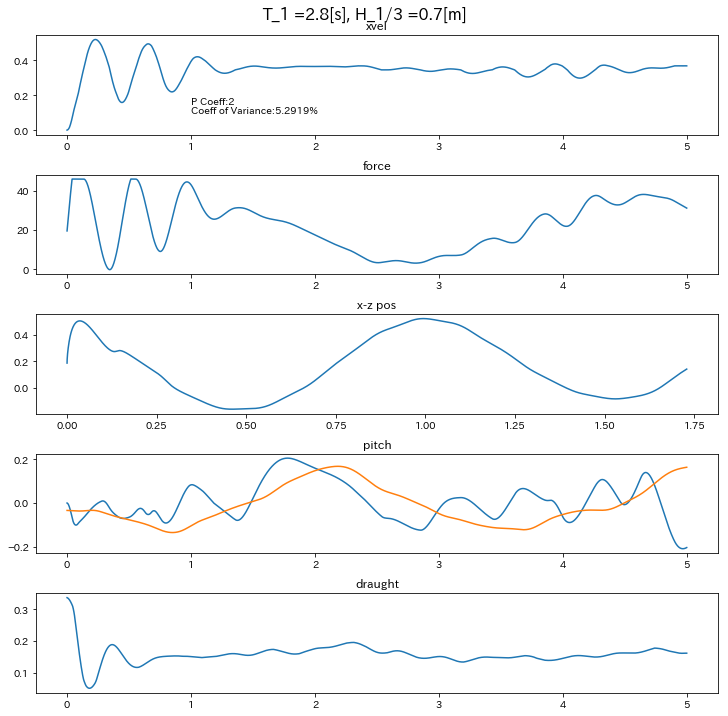

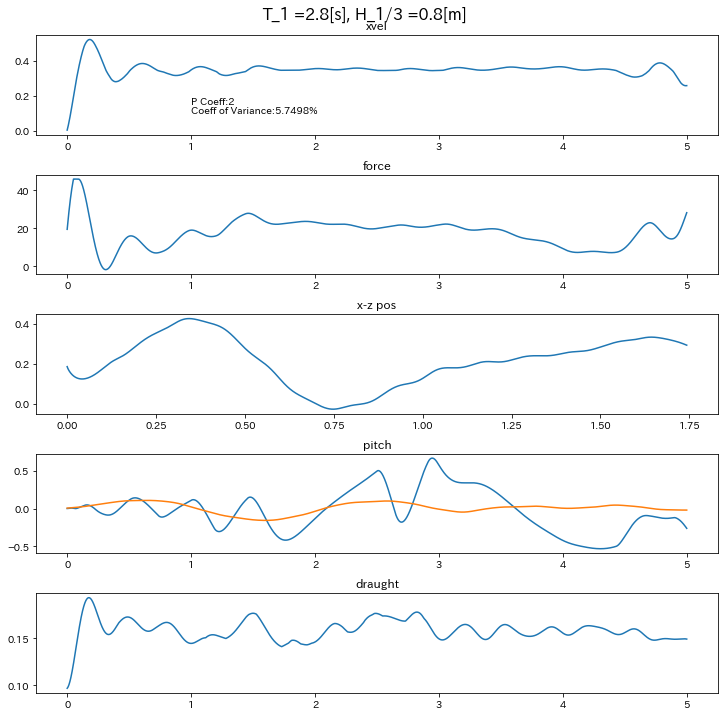

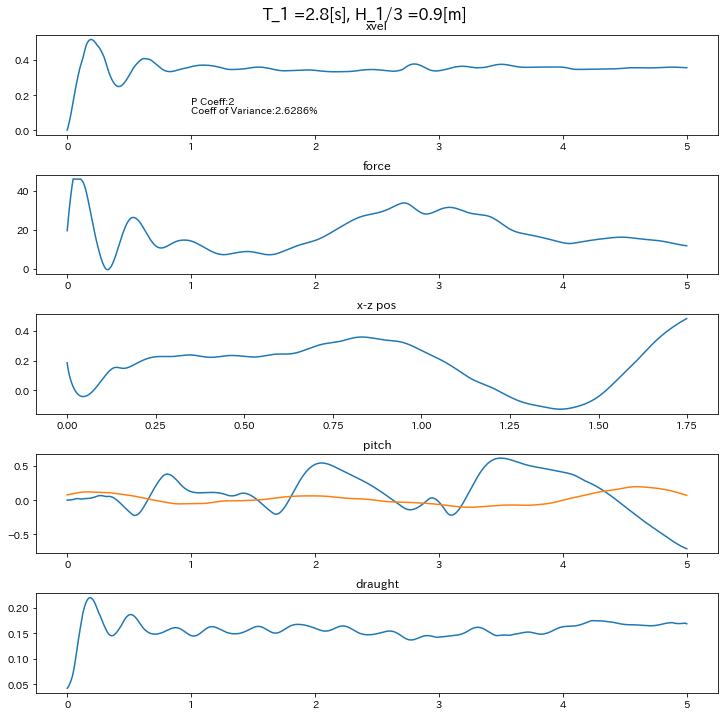

In [5]:
for j in range(1,10):
    #reset variables
    if('ww' in globals()):del ww
    if('pp' in globals()):del pp
    if('dd' in globals()):del dd

    #create environment JONSWAP(num_waves, T_1, H_third)
    T_1 = 2.8
    H_3 = j/10
    ww = ss.JONSWAP(100,T_1,H_3)

    pp = ship.Ship(0,0.185)
    t=0.0
    num = 1*5*1000
    # force = 23*2*0.4
    forcelimit = 23*2
    force = 18.8
    prevForce = 0

    P_coeff = 2

    dl = []
    xl = []
    xvl = []
    xal = []
    zl = [] 
    zvl= []
    zal =[]
    eng = []
    pl = []
    wil = []
    fl = []
    fps = 50
    limit = round(round(1./dt)/fps)

    filename = f'T{T_1}_H{H_3}_F{force}'



    fileList = glob.glob('./output/*.png')
    for filePath in fileList:
        try:
            os.remove(filePath)
        except:
            print("Error while deleting file : ", filePath)

    filenamecount = 0
    for i in range(num):
        force = force + P_coeff*(0.35-pp.velx)
        if(force > forcelimit): force = forcelimit
        pp.update(ww,t,force)

        dl.append(pp.draught)
        xl.append(pp.posx)
        xvl.append(pp.velx)
        xal.append(pp.accx)
        zl.append(pp.posz)
        zvl.append(pp.velz)
        zal.append(pp.accz)
        wil.append(pp.wave_incline)
        pl.append(pp.angle*(180/math.pi))
        eng.append(pp.mass*pp.velz**2)
        fl.append(force)
        t+=dt
        

    xvl_trunc = xvl[-round(len(xvl)/2):]
    stdev = statistics.stdev(xvl_trunc)
    mean = statistics.mean(xvl_trunc)
    cv = stdev/mean*100
    print(stdev,mean)
    print(cv)

    tdata = np.arange(0,num*dt,dt)
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5,figsize=(10,10),constrained_layout=True)

    fig.suptitle( "T_1 =" + str(T_1) + "[s], H_1/3 =" + str(H_3) + "[m]", fontsize=16)

    ax1.plot(tdata,xvl)
    ax1.set_title('xvel')
    ax1.text(1,0.15, f'P Coeff:{P_coeff}')
    ax1.text(1,0.1,f'Coeff of Variance:{cv:.04f}%')

    ax2.plot(tdata,fl)
    ax2.set_title('force')

    ax3.plot(xl,zl)
    ax3.set_title('x-z pos')

    ax4.plot(tdata,pl)
    ax4.plot(tdata,wil)
    ax4.set_title('pitch')

    ax5.plot(tdata,dl)
    ax5.set_title('draught')

    fig.savefig("./figures/"+f"{filename}-{time.time()}.png")